# Import the basic libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data and Perform Preprocessing

In [13]:
pat_df = pd.read_csv(r"C:\Users\Ankan\Desktop\GMLP 2nd Jan\Patient Survival Detection\Dataset.csv")
pat_df.head(20)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.450000,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,120995,50129,33,0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,42871,90749,118,0,50.0,25.710000,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [3]:
pat_df.shape

(91713, 186)

In [4]:
pat_df.isna().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

# Dropping Columns with Null values having threshold of 0.5

In [22]:
thresh = len(pat_df) * .5
pat_df.dropna(thresh = thresh, axis = 1, inplace = True)

Dataset contains both non-numeric( object type) and numeric(int/float) data. 
Hence, we need to perform encoding of those features. Since the feature columns are numerous and varied, we shall
execute label-encoding to the above data.

In [8]:
pat_df.nunique()

encounter_id                   91713
patient_id                     91713
hospital_id                      147
hospital_death                     2
age                               74
                               ...  
leukemia                           2
lymphoma                           2
solid_tumor_with_metastasis        2
apache_3j_bodysystem              11
apache_2_bodysystem               10
Length: 112, dtype: int64

This shows that encounter_id and patient_id contain similar data, hence both can be removed.
Additionally, hospital_id is not relevant to hospital_death. So that too, can be removed.

In [14]:
pat_df=pat_df.drop(columns=['encounter_id','hospital_id','patient_id'])

In [ ]:
#eth_unique=pat_df['ethnicity'].unique()
#eth_unique

# Import label encoder for encoding the non-numeric data

In [15]:

from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [16]:
pat_df.select_dtypes(include='object')

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...,...
91708,Caucasian,M,Acute Care/Floor,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Emergency Department,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular
91710,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory


In [17]:
pat_df['ethnicity']= label_encoder.fit_transform(pat_df['ethnicity']) 
pat_df['gender']= label_encoder.fit_transform(pat_df['gender'])
pat_df['hospital_admit_source']= label_encoder.fit_transform(pat_df['hospital_admit_source']) 
pat_df['icu_admit_source']= label_encoder.fit_transform(pat_df['icu_admit_source']) 
pat_df['icu_stay_type']= label_encoder.fit_transform(pat_df['icu_stay_type']) 
pat_df['icu_type']= label_encoder.fit_transform(pat_df['icu_type']) 
pat_df['apache_3j_bodysystem']= label_encoder.fit_transform(pat_df['apache_3j_bodysystem']) 
pat_df['apache_2_bodysystem']= label_encoder.fit_transform(pat_df['apache_2_bodysystem']) 

In [14]:
pat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 109 entries, hospital_death to apache_2_bodysystem
dtypes: float64(96), int32(8), int64(5)
memory usage: 73.5 MB


We don't find any data in object datatype. Therefore, we can go ahead for further pre-processing. We perform univariate analysis to check the degree of skewdness of the data.

# Univariate Analysis

C:\Users\Ankan\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


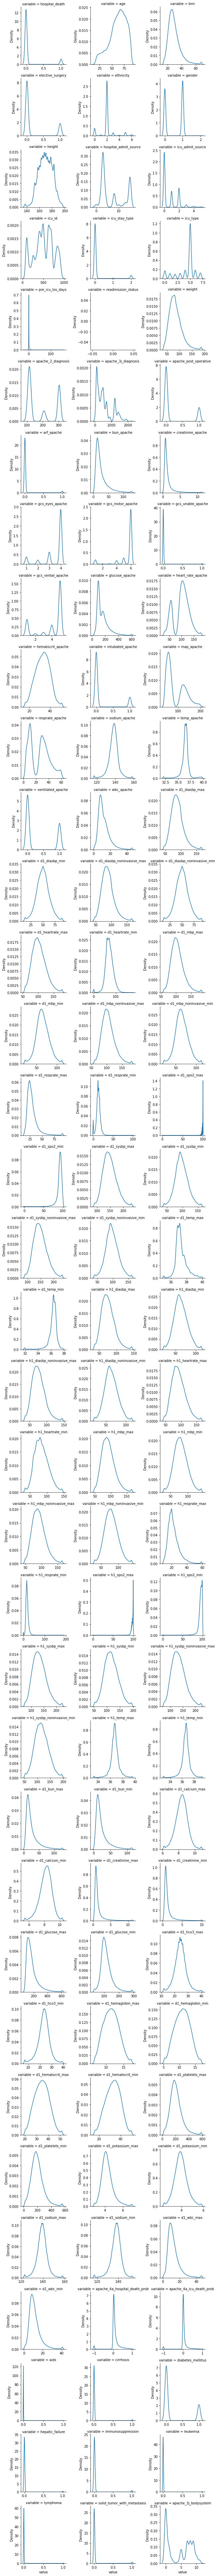

In [24]:
unpivot = pd.melt(pat_df, pat_df.describe().columns[-1], pat_df.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

C:\Users\Ankan\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


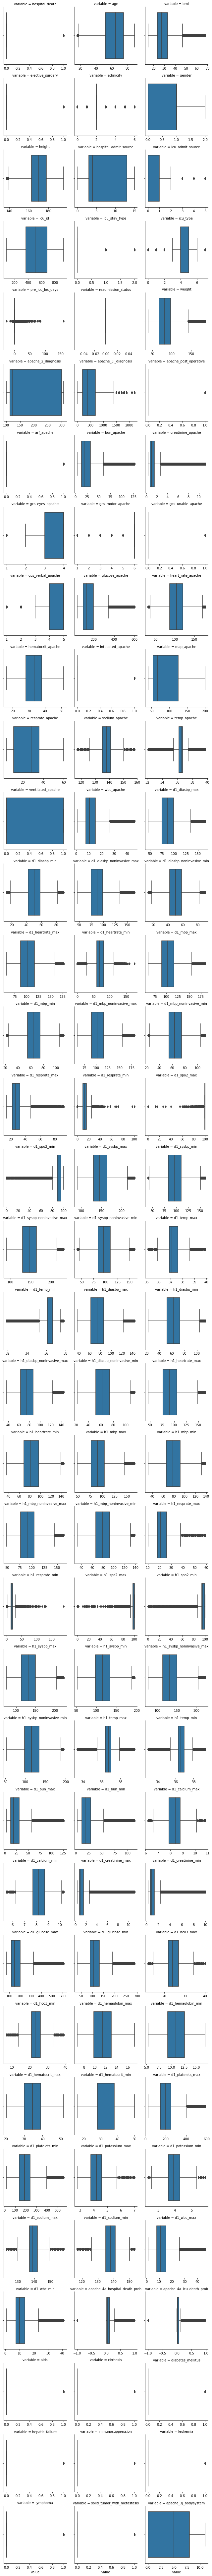

In [25]:
unpivot = pd.melt(pat_df, pat_df.describe().columns[-1], pat_df.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

# Removal of highly skewed columns

In [33]:
num_features=pat_df.dtypes[pat_df.dtypes!='object'].index
skew_features= pat_df[num_features].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_features})

In [34]:
skewness

,Skew
icu_stay_type,3.810668
d1_creatinine_min,3.616993
d1_creatinine_max,3.597629
creatinine_apache,3.546544
hospital_death,2.946519
...,...
apache_4a_hospital_death_prob,-1.484047
gcs_eyes_apache,-1.684388
apache_4a_icu_death_prob,-2.028836
gcs_motor_apache,-2.712376


In [18]:
pat_df=pat_df.drop(columns=['aids','lymphoma','leukemia', 'pre_icu_los_days','gcs_unable_apache','d1_spo2_min','h1_spo2_min','h1_spo2_max','d1_spo2_max'])

In [19]:
pat_df=pat_df.drop(columns=['hepatic_failure','cirrhosis','solid_tumor_with_metastasis', 'immunosuppression','arf_apache'])

In [20]:
pat_df=pat_df.drop(columns=['icu_stay_type','d1_creatinine_min','d1_creatinine_max', 'creatinine_apache','readmission_status','gcs_motor_apache'])

In [79]:
pat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 89 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_death                 91713 non-null  int64  
 1   age                            87485 non-null  float64
 2   bmi                            88284 non-null  float64
 3   elective_surgery               91713 non-null  int64  
 4   ethnicity                      91713 non-null  int32  
 5   gender                         91713 non-null  int32  
 6   height                         90379 non-null  float64
 7   hospital_admit_source          91713 non-null  int32  
 8   icu_admit_source               91713 non-null  int32  
 9   icu_id                         91713 non-null  int64  
 10  icu_type                       91713 non-null  int32  
 11  weight                         88993 non-null  float64
 12  apache_2_diagnosis             90051 non-null 

In [24]:
pat_df_copy=pat_df.copy()

# Multivariate Analysis

C:\Users\Ankan\AppData\Local\Temp/ipykernel_20124/1598940826.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

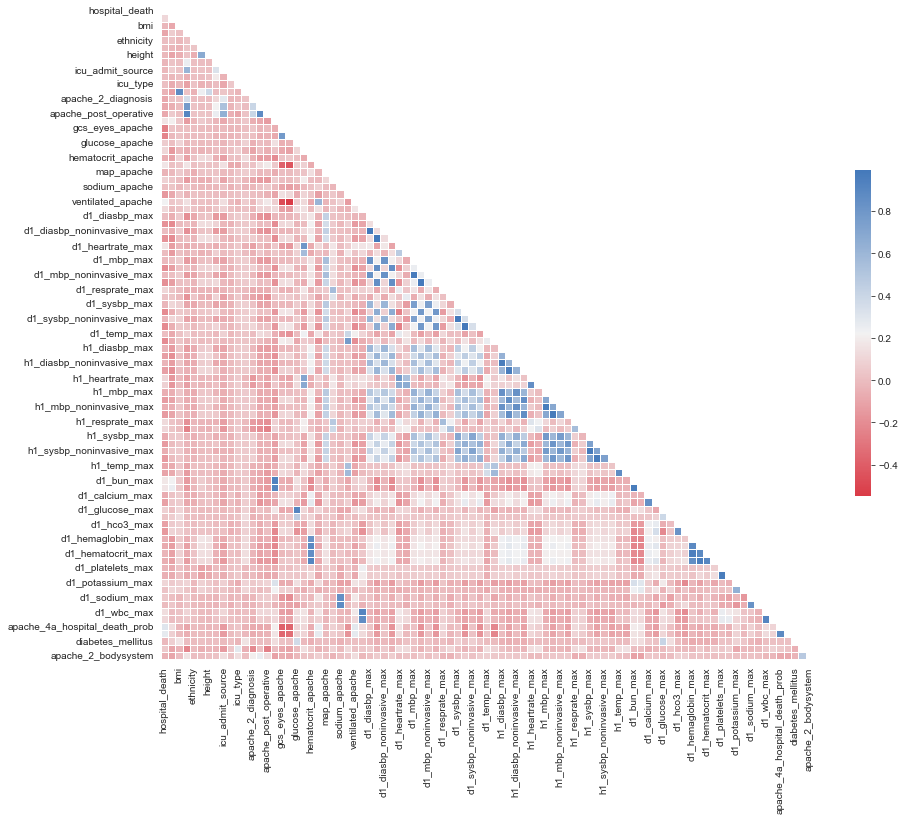

In [60]:
corr = pat_df_copy.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Removing Nan, null, very high float values(~ infinity) with Median

In [25]:
pat_df_copy=pat_df_copy.fillna(pat_df.median())

# Splitting the data and scaling the data

In [26]:
from sklearn.model_selection import train_test_split

X = pat_df_copy.drop(["hospital_death"], axis=1)
y = pat_df_copy['hospital_death']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
#Scaling the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preparing baseline models using Random forest, SVM, Naive Bayes and Decision trees.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
ranf = RandomForestClassifier()
ranf.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [92]:
nb= MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [55]:
svm= SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [66]:
from sklearn.metrics import accuracy_score, f1_score, 

In [90]:
y_pred=nb.predict(X_test)

nb_acc=accuracy_score(y_pred, y_test)
print("Accuracy of Naive-Bayes: %.2f" % nb_acc)
nb_f1=f1_score(y_pred, y_test)
print("F1-Score of Naive-Bayes: %.2f" % nb_f1)

Accuracy of Naive-Bayes: 0.91
F1-Score of Naive-Bayes: 0.27


In [82]:
y_pred=ranf.predict(X_test)

ranf_acc=accuracy_score(y_pred, y_test)
print("Accuracy of Random_forest Classifier: %.2f" % ranf_acc)
ranf_f1=f1_score(y_pred, y_test)
print("F1-Score of Random_forest Classifier: %.2f" % ranf_f1)

Accuracy of Random_forest Classifier: 0.93
F1-Score of Random_forest Classifier: 0.38


In [83]:
y_pred=dectree.predict(X_test)

dectree_acc=accuracy_score(y_pred, y_test)
print("Accuracy of Decision Trees: %.2f" % dectree_acc)
dectree_f1=f1_score(y_pred, y_test)
print("F1-Score of Decision Trees: %.2f" % dectree_f1)

Accuracy of Decision Trees: 0.88
F1-Score of Decision Trees: 0.34


In [84]:
y_pred=svm.predict(X_test)

svm_acc=accuracy_score(y_pred, y_test)
print("Accuracy of SVM: %.2f" % svm_acc)
svm_f1=f1_score(y_pred, y_test)
print("F1-Score of SVM: %.2f" % svm_f1)

Accuracy of SVM: 0.92
F1-Score of SVM: 0.27


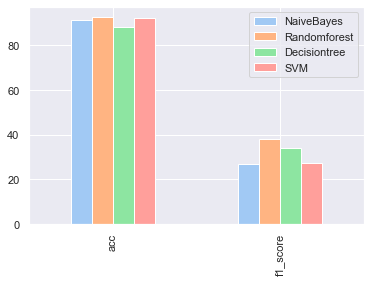

In [97]:
error_rec = {
    "NaiveBayes": {
        "acc": nb_acc*100,
        "f1_score": nb_f1*100
    },
    "Randomforest": {
        "acc": ranf_acc*100,
        "f1_score": ranf_f1*100
    },
    "Decisiontree": {
        "acc": dectree_acc*100,
        "f1_score": dectree_f1*100
    },
    "SVM": {
        "acc": svm_acc*100,
        "f1_score": svm_f1*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

Random Forest Classifier has the highest accuracy amongst all the models.

# Hyperparameter tuning the Random forest and SVM models using GridSearchCV.

In [8]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [69]:
# parameter grid
parameters = {
    'max_depth': [8, 10, 15], 
    'min_samples_split': [8, 12, 14],
    'n_estimators'  : [10, 20, 25],
}

In [70]:
clf = GridSearchCV(ranf,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=5)

In [108]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=10,
                                              min_samples_split=10,
                                              n_estimators=20),
             param_grid={'max_depth': [8, 10, 15],
                         'min_samples_split': [8, 12, 14],
                         'n_estimators': [10, 20, 25]},
             scoring='accuracy')

In [109]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'max_depth': 15, 'min_samples_split': 14, 'n_estimators': 25}
Accuracy : 0.9270428061220166


In [71]:
ranf = RandomForestClassifier(max_depth = 15, 
                            min_samples_split = 14, 
                            n_estimators = 25)
ranf.fit(X_train,y_train)
y_pred = ranf.predict(X_test)
print("Accuracy:",ranf.score(X_test, y_test))

Accuracy: 0.9258243573646997


Hyperparameter tuning the SVM model

In [56]:
parameters_svm = {
    'C': [1], }

clf = GridSearchCV(svm,                    # model
                   param_grid = parameters_svm,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   verbose=3,
                   cv=5)

In [6]:
print(svm.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])


In [57]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...............................C=1;, score=0.923 total time= 4.6min
[CV 2/5] END ...............................C=1;, score=0.927 total time= 4.6min
[CV 3/5] END ...............................C=1;, score=0.924 total time= 4.5min
[CV 4/5] END ...............................C=1;, score=0.926 total time= 4.5min
[CV 5/5] END ...............................C=1;, score=0.925 total time= 4.5min


GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [1]}, scoring='accuracy',
             verbose=3)

In [58]:
print("Tuned Hyperpara01.meters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperpara01.meters : {'C': 1}
Accuracy : 0.9249922767925511


In [59]:
svm = SVC(C = 1, verbose = 3)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print("Accuracy:",svm.score(X_test, y_test))

[LibSVM]Accuracy: 0.9241062578470891


# Accuracy for Random Forest on Test set: 0.926

Accuracy for SVM(libLinear) on Test set: 0.922 

Accuracy for SVM(libSVM) on Test set: 0.924

# Saving the final models

In [72]:
import joblib

#Saving the model
joblib.dump(svm, 'libsvm_psd_tuned_jlib')

['libsvm_psd_tuned_jlib']

In [73]:
joblib.dump(ranf , 'ranf_psd_tuned_jlib')

['ranf_psd_tuned_jlib']

In [74]:
ranf_jlib = joblib.load('ranf_psd_tuned_jlib')

In [75]:
ranf_jlib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
svm_jlib = joblib.load('libsvm_psd_tuned_jlib')

In [77]:
svm_jlib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)